# MATH 210 Introduction to Mathematical Computing

## October 16, 2019

* Examples: numerical integration
* SciPy functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Consider the integral

$$
\int_e^{10} \ln (\ln x) \, dx
$$

Find a value $N$ which guarantees the error for right Riemann sums $E_N^R(f)$ is less than $10^{-5}$. We need the error formula

$$
E_N^R(f) \leq \frac{(b - a)^2}{2N} K_1
$$

where $|f'(x)| \leq K_1$ for all $x \in [a,b]$. We compute

$$
f'(x) = \frac{1}{x \ln x}
$$

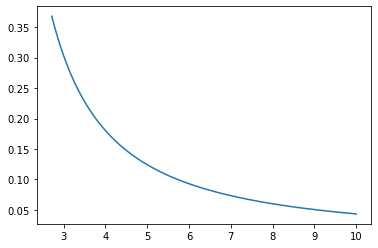

In [2]:
x = np.linspace(np.e,10,100)
y = 1/(np.log(x)*x)
plt.plot(x,y)
plt.show()

We see that $K_1 = 1/e$ therefore

In [3]:
N = (10 - np.e)**2*10**5/(2*np.e)
print(N)

975311.297280164


Find a value $N$ which guarantees the error for the trapezoid rule $E_N^T(f)$ is less than $10^{-5}$. We need the error formula

$$
E_N^T(f) \leq \frac{(b - a)^3}{12N^2} K_2
$$

where $|f''(x)| \leq K_2$ for all $x \in [a,b]$. We compute

$$
f''(x) = - \frac{(1 + \ln x)}{(x \ln x)^2}
$$

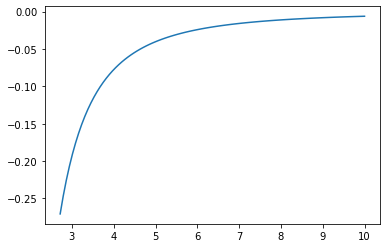

In [4]:
x = np.linspace(np.e,10,100)
y = -(np.log(x) + 1)/(np.log(x)*x)**2
plt.plot(x,y)
plt.show()

We see that $K_2 = 2/e$ therefore

In [5]:
np.sqrt((10 - np.e)**3*10**5/(6*np.e**2))

933.2128111772521

## SciPy

[SciPy](https://scipy.org) contains subpackages for many numerical applciations. Let's import the `scipy.integrate` subpackage.

In [6]:
import scipy.integrate as spi

There are several functions for [computing integrals](https://docs.scipy.org/doc/scipy/reference/integrate.html) including a function to implement the trapezoid rule. Let's check the documentation.

In [7]:
spi.trapz?

Let's use this function to approximate the integral above with error less than $10^{-5}$.

In [8]:
N = 934
a = np.e
b = 10
x = np.linspace(a,b,N+1)
y = np.log(np.log(x))
I = spi.trapz(y,x)
print(I)

4.069841120660495


Let's compare our own method.

In [9]:
dx = (b - a)/N
I = dx/2*np.sum(y[1:] + y[:-1])
print(I)

4.069841120660496


It's the same except for the last digit which is due to a different rounding error in both computations.

Let's look at the function which implements Simpson's rule.

In [10]:
spi.simps?

Simpson's rule performs better than the trapezoid rule. Let's compute the integral above with the same $N$.

In [11]:
spi.simps(y,x)

4.069842764041077

Notice that the first 5 digits are the same in both approximations. This is what we expect since we know that the trapezoid rule approximation is exact up to $10^{-5}$.